In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
print(df.shape)
print(df.head())

Data imported successfully
(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


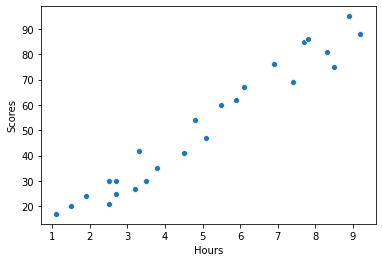

In [3]:

# Plotting the distribution of scores
ax=sns.scatterplot(x='Hours',y='Scores',data=df)

In [4]:


X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print(X_test.shape)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train,y_train)

(5, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

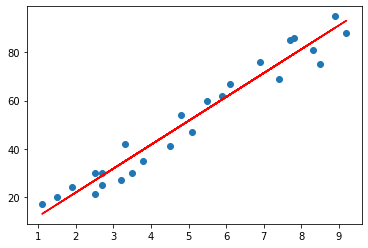

In [5]:
# Plotting the regression line
line = model1.coef_*X+model1.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='r');
plt.show()

In [6]:

y_pred1 = model1.predict(X_test) # Predicting the scores

from sklearn import metrics
print('Mean Absolute Error of ridge model:'  ,   metrics.mean_absolute_error(y_test, y_pred1))
print('training Score:',model1.score(X_train,y_train))
print('test score:',model1.score(X_test,y_test))


Mean Absolute Error of ridge model: 4.183859899002982
training Score: 0.9515510725211553
test score: 0.9454906892105354


Mean Absolute Error of ridge model: 4.0893423672211195
training Score: 0.9514897501245393
test score: 0.9469535028586777


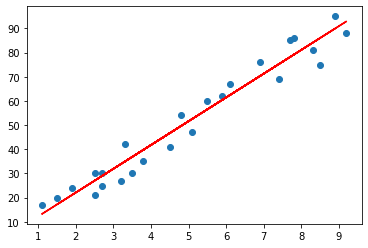

In [7]:
from sklearn.linear_model import Ridge
model2=Ridge(random_state=42)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print('Mean Absolute Error of ridge model:'  ,   metrics.mean_absolute_error(y_test, y_pred2))
print('training Score:',model2.score(X_train,y_train))
print('test score:',model2.score(X_test,y_test))
line = model2.coef_*X+model2.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='r');
plt.show()


In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameter={'alpha': [0.3,0.6,0.9]}
model3=GridSearchCV(Lasso(), param_grid= parameter)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print('Mean Absolute Error of lasso model:'  ,   metrics.mean_absolute_error(y_test, y_pred3))
print('training Score:',model3.score(X_train,y_train))
print('test score:',model3.score(X_test,y_test))



Mean Absolute Error of lasso model: 4.010805386507835
training Score: 0.9513455022862184
test score: 0.9480194868826209


In [9]:
hours=[[9.5]]
pred_val1 = model1.predict(hours)
pred_val2 = model2.predict(hours)
pred_val3 = model3.predict(hours)
print('The predicted value with linear Regression :{}'.format(pred_val1))
print('The predicted value with ridge Regression :{}'.format(pred_val2))
print('The predicted value with Lasso Regression :{}'.format(pred_val3))

The predicted value with linear Regression :[96.16939661]
The predicted value with ridge Regression :[95.8304701]
The predicted value with Lasso Regression :[95.5488476]
